<a href="https://colab.research.google.com/github/irisnoww/data-science-playground/blob/main/Decision_Trees_and_Random_Forest_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

# Import Libraries

**Import the usual libraries for pandas and plotting. 

In [ ]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [ ]:
import io
loan_df = pd.read_csv(io.BytesIO(uploaded['loan_data.csv']),delim_whitespace=True)

** Check out the info(), head(), and describe() methods on loans.**

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
load_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis


** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


In [ ]:
import numpy
import matplotlib.pyplot as plt

In [ ]:
fico_1 = load_df['fico'][load_df['credit.policy']==1]
fico_2 = load_df['fico'][load_df['credit.policy']==0]

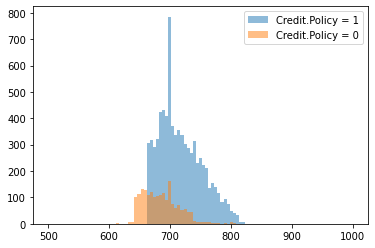

In [ ]:
bins = numpy.linspace(500, 1000, 100)
x = plt.hist(fico_1, bins, alpha=0.5, label='Credit.Policy = 1')
y = plt.hist(fico_2, bins, alpha=0.5, label='Credit.Policy = 0')
plt.legend(loc='upper right')
plt.show()

(array([[   2.,    0.,  916., 1984., 1447., 1195., 1231.,  546.,  302.,
           87.],
        [  10.,  350.,  458.,  501.,  288.,  197.,   38.,   12.,   11.,
            3.]]),
 array([612. , 633.5, 655. , 676.5, 698. , 719.5, 741. , 762.5, 784. ,
        805.5, 827. ]),
 <a list of 2 Lists of Patches objects>)

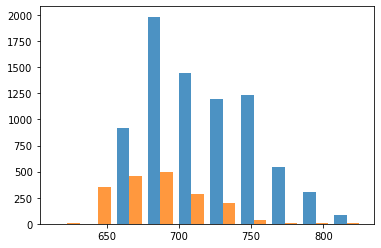

In [ ]:
# bins = numpy.linspace(600, 900, 200)
plt.hist([fico_1,fico_2],alpha = 0.8, label=['fico_1','fico_2'])

** Create a similar figure, except this time select by the not.fully.paid column.**

In [ ]:
not_fully_paid_1 = load_df['fico'][load_df['not.fully.paid']==1]
not_fully_paid_2 = load_df['fico'][load_df['not.fully.paid']==0]

(array([[   6.,  106.,  316.,  446.,  285.,  193.,  118.,   39.,   21.,
            3.],
        [   6.,  244., 1058., 2039., 1450., 1199., 1151.,  519.,  292.,
           87.]]),
 array([612. , 633.5, 655. , 676.5, 698. , 719.5, 741. , 762.5, 784. ,
        805.5, 827. ]),
 <a list of 2 Lists of Patches objects>)

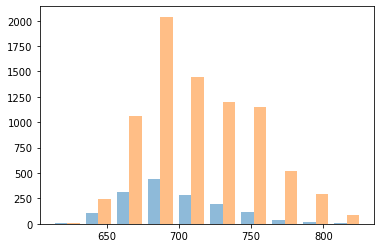

In [ ]:
plt.hist([not_fully_paid_1,not_fully_paid_2],alpha = 0.5, label=['not_fully_paid_1','not_fully_paid_2'])

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


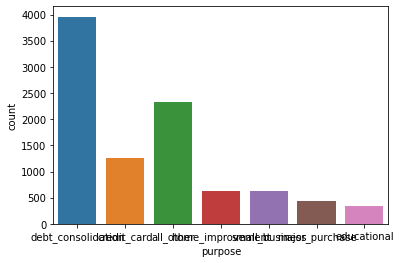

In [ ]:
sns.countplot(data = load_df, x=load_df['purpose'],hue_order=load_df['not.fully.paid'])

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

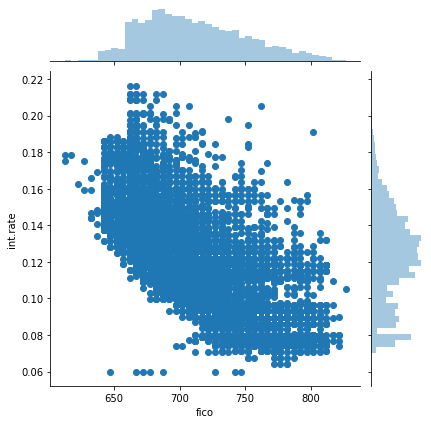

In [ ]:
sns.jointplot(load_df['fico'],load_df['int.rate'], data=load_df, kind='scatter')

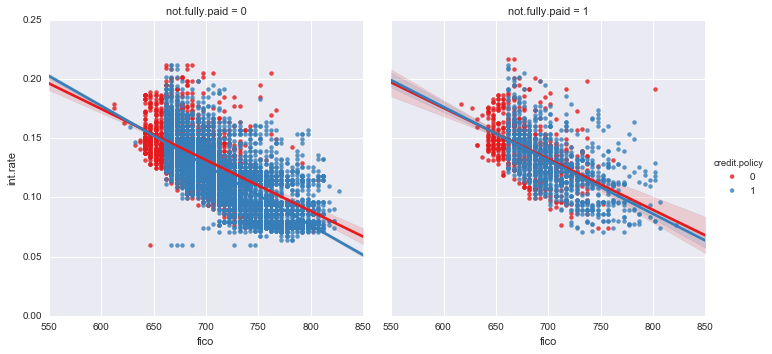

In [ ]:
sns.lmplot(load_df['fico'],load_df['int.rate'],data=load_df, hue=load_df['not.fully.paid'])

# Setting up the Data

**Check loans.info() again.**

In [ ]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [ ]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [ ]:
final_data = pd.get_dummies(load_df, columns= cat_feats,drop_first=True)

In [ ]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('not.fully.paid',axis=1)

In [ ]:
y = final_data['not.fully.paid']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [ ]:
dst = DecisionTreeClassifier()

In [ ]:
loan_des = dst.fit(X_train,  y_train)

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [ ]:
load_pred = loan_des.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,load_pred))

[[2682  555]
 [ 459  136]]


In [ ]:
print(classification_report(y_test,load_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3237
           1       0.20      0.23      0.21       595

    accuracy                           0.74      3832
   macro avg       0.53      0.53      0.53      3832
weighted avg       0.75      0.74      0.74      3832



## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_load = rfc.fit(X_train,y_train)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [ ]:
rfc_loan_pred = rfc_load.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [ ]:
print(classification_report(y_test,rfc_loan_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3237
           1       0.50      0.03      0.06       595

    accuracy                           0.84      3832
   macro avg       0.67      0.51      0.49      3832
weighted avg       0.79      0.84      0.78      3832



             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.01      0.02       443

avg / total       0.80      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

In [ ]:
print(confusion_matrix(y_test,rfc_loan_pred))

[[3219   18]
 [ 577   18]]


**What performed better the random forest or the decision tree?**